# Load of the libraries

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import files

uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

Load of the images

In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
import os
print(os.listdir('.'))

['.config', 'dataset', 'archive.zip', 'sample_data']


In [6]:
dataset_path = "dataset"
categories = os.listdir(dataset_path)
categories.sort()
print("Categories:", categories)

Categories: ['Beagle', 'Boxer', 'Bulldog', 'Dachshund', 'German_Shepherd', 'Golden_Retriever', 'Labrador_Retriever', 'Poodle', 'Rottweiler', 'Yorkshire_Terrier']


In [13]:
images = []
labels = []

for idx, category in enumerate(categories):
    folder = os.path.join(dataset_path, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        try:
            img = load_img(img_path, target_size=(64, 64))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(idx)
        except:
            pass

X = np.array(images, dtype="float32") / 255.0
y = np.array(labels)

y = to_categorical(y, num_classes=len(categories))

print("Images:", X.shape)
print("Images:", y.shape)

Images: (967, 64, 64, 3)
Images: (967, 10)


# 4. MLP

In [8]:
X_flat = X.reshape(X.shape[0], -1)
print("MLP:", X_flat.shape)

MLP: (967, 12288)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

num_classes = y.shape[1]

model = Sequential([
    Dense(512, input_shape=(X_flat.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,425,866 (24.51 MB)

 Trainable params: 6,425,866 (24.51 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Training of the model

In [17]:
history = model.fit(X_flat, y,batch_size=32,epochs=30, validation_split=0.2,verbose=1)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.1313 - loss: 9.0872 - val_accuracy: 0.0000e+00 - val_loss: 6.8425
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1701 - loss: 2.9528 - val_accuracy: 0.0000e+00 - val_loss: 4.2415
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1975 - loss: 2.0890 - val_accuracy: 0.0000e+00 - val_loss: 3.9982
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2122 - loss: 2.0172 - val_accuracy: 0.0155 - val_loss: 4.1857
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2607 - loss: 1.9206 - val_accuracy: 0.0000e+00 - val_loss: 6.3630
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2849 - loss: 1.8799 - val_accuracy: 0.0000e+00 - val_loss: 6.5352
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3229 - loss: 1.7517 - val_accuracy: 0.0000e+00 - val_loss: 5.6733
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4029 - loss: 1.6508 - val_

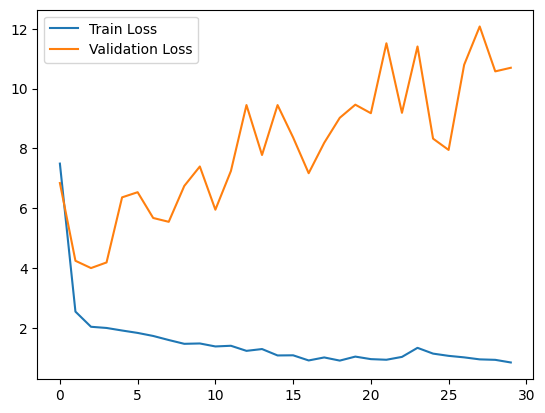

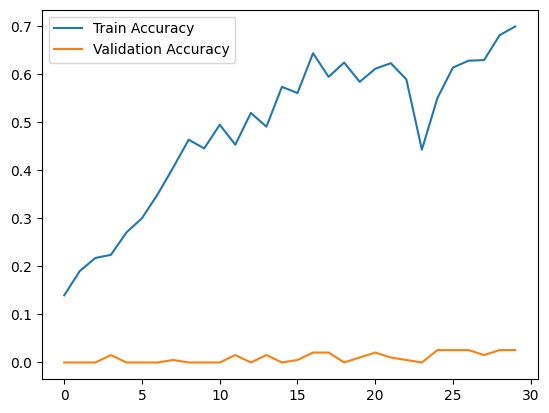

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()